# 1st example: linearly separable synthetic dataset

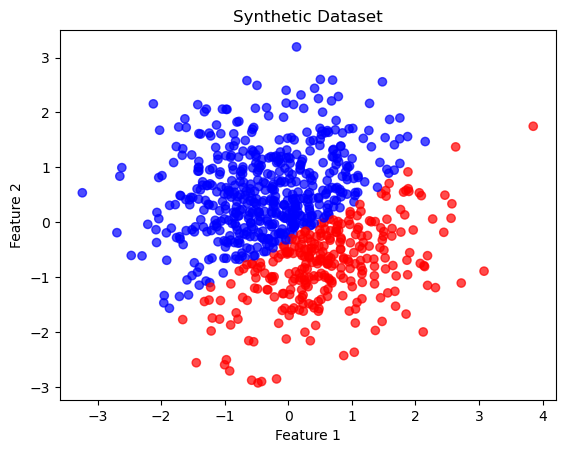

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Seed for reproducibility
np.random.seed(42)

# Number of samples
n_samples = 1000

# Generate random features
X = np.random.randn(2, n_samples)  # 2 features, n_samples examples

# Generate a linearly separable target
# Define the true weights and bias
true_weight = np.array([[2], [-3]])
true_bias = -1

# Linear combination of features and true weights + bias
linear_combination = np.dot(true_weight.T, X) + true_bias

# Apply sigmoid to get probabilities
probabilities = 1 / (1 + np.exp(-linear_combination))

# Generate binary target based on these probabilities
y = (probabilities > 0.5).astype(int)

# Flatten y to have shape (1, n_samples)
y = y.flatten()

# Split data into training and test sets
split_ratio = 0.8
split_index = int(n_samples * split_ratio)

X_train = X[:, :split_index]
y_train = y[:split_index]
X_test = X[:, split_index:]
y_test = y[split_index:]

# Plot the synthetic data
plt.scatter(X_train[0, :], X_train[1, :], c=y_train, cmap='bwr', alpha=0.7)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Synthetic Dataset')
plt.show()


In [2]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((2, 800), (800,), (2, 200), (200,))

In [3]:
# %load ../src/ml/logistic_regression.py
import numpy as np
import matplotlib.pyplot as plt

#initialize
def initialize(dimension):
    weight = np.full((dimension,1), 0.01)
    bias = 0.0
    return weight, bias
    
def sigmoid(z):
    y_head = 1/(1+ np.exp(-z))
    return y_head

def cross_entropy_loss(y_pred, y_true):
    loss = -(y_true*np.log(y_pred) + (1-y_true)*np.log(1-y_pred))
    cost = np.sum(loss) / y_true.shape[0]
    return cost


def forwardBackward(weight, bias, x_train, y_train):
    # Forward
    y_pred = sigmoid(np.dot(weight.T, x_train) + bias)
    cost = cross_entropy_loss(y_pred, y_train)

    # Backward
    derivative_weight = np.dot(x_train,((y_pred-y_train).T))/x_train.shape[1]
    derivative_bias = np.sum(y_pred-y_train) / x_train.shape[1]
    gradients = {"Derivative Weight" : derivative_weight, "Derivative Bias" : derivative_bias}

    return cost, gradients

def update(weight, bias, x_train, y_train, learning_rate, iteration) :
    costList = []
    index = []

    #for each iteration, update weight and bias values
    for i in range(iteration):
        cost, gradients = forwardBackward(weight, bias, x_train, y_train)
        weight = weight - learning_rate * gradients["Derivative Weight"]
        bias = bias - learning_rate * gradients["Derivative Bias"]

        costList.append(cost)
        index.append(i)

    parameters = {"weight": weight,"bias": bias}

    print("iteration:",iteration)
    print("cost:",cost)

    plt.plot(index,costList)
    plt.xlabel("Number of Iteration")
    plt.ylabel("Cost")
    plt.show()

    return parameters, gradients

def predict(weight,bias,x_test):
    z = np.dot(weight.T,x_test) + bias
    y_head = sigmoid(z)

    y_prediction = np.zeros((1,x_test.shape[1]))

    for i in range(y_head.shape[1]):
        if y_head[0,i] <= 0.5:
            y_prediction[0,i] = 0
        else:
            y_prediction[0,i] = 1
    return y_prediction

def logistic_regression_fit(x_train, y_train, learningRate, iteration):
    dimension = x_train.shape[0]
    weight,bias = initialize(dimension)

    parameters, _ = update(weight,bias,x_train,y_train,learningRate,iteration)

    return parameters

def logistic_regression_predict(parameters, x_test, y_test):
    y_prediction = predict(parameters["weight"],parameters["bias"], x_test)
    print("Test Accuracy: {:.2f}%".format((100 - np.mean(np.abs(y_prediction - y_test))*100)))

iteration: 1000
cost: 0.11075861839644642


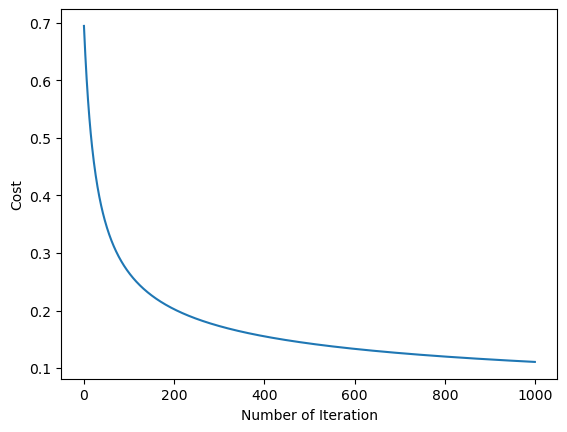

Model parameters: {'weight': array([[ 2.88632454],
       [-4.12535387]]), 'bias': -1.5062221001956653}
Test Accuracy: 99.50%


In [4]:
params = logistic_regression_fit(X_train, y_train, 0.1, 1000)
print(f'Model parameters: {params}')
logistic_regression_predict(params, X_test, y_test)

In [5]:
X_train.shape, y_train.shape

((2, 800), (800,))

In [6]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(X_train.T, y_train)
clf.predict(X_test.T)
clf.predict_proba(X_test.T)
clf.score(X_test.T, y_test)

0.995

# 2nd example: non-linearly separable synthetic dataset

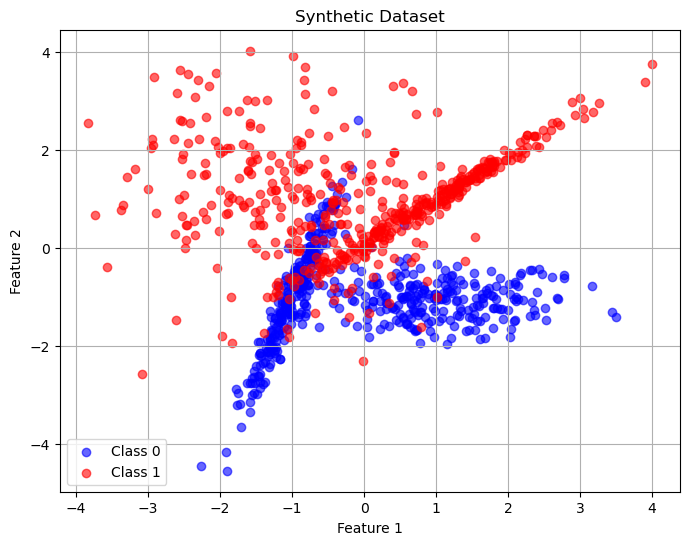

In [11]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

# Generate the synthetic dataset
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, random_state=42)

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='blue', label='Class 0', alpha=0.6)
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='red', label='Class 1', alpha=0.6)
plt.title('Synthetic Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

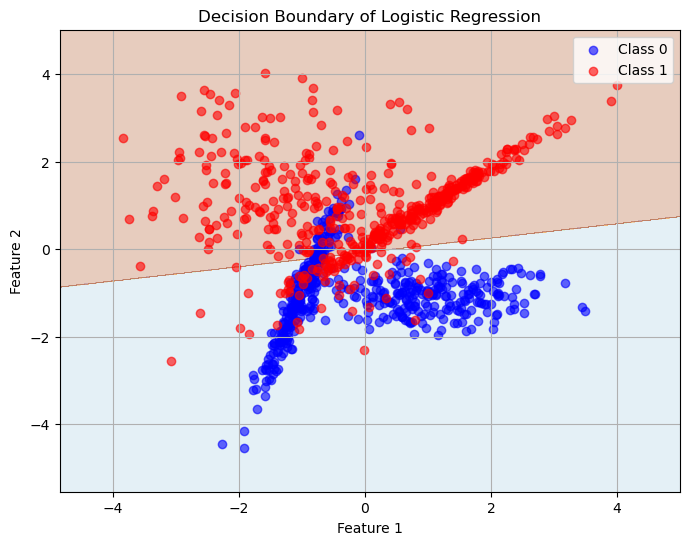

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Generate the synthetic dataset
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, random_state=42)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Logistic Regression classifier
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

# Plot the decision boundary
plt.figure(figsize=(8, 6))

# Create a mesh to plot the decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# Predict probabilities on the mesh grid
Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary and the dataset points
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired)
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='blue', label='Class 0', alpha=0.6)
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='red', label='Class 1', alpha=0.6)
plt.title('Decision Boundary of Logistic Regression')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

In [16]:
y_pred = classifier.predict(X_test)
print("Test Accuracy: {:.2f}%".format((100 - np.mean(np.abs(y_pred - y_test))*100)))

Test Accuracy: 87.33%
